In [1]:
# --- 1. Setup and Load Data ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Load merged dataset ((from preprocessing step)
merged = pd.read_csv("merged_cleaned_dataset.csv")

# Standardize column names ---
merged.columns = merged.columns.str.lower()

print("✅ Data loaded for EDA")
print("Shape:", merged.shape)
print("Columns:", merged.columns.tolist())


✅ Data loaded for EDA
Shape: (1192, 12)
Columns: ['customer_id', 'age', 'gender', 'location', 'incomelevel', 'signupdate', 'total_spent', 'avg_spent', 'num_transactions', 'max_transaction', 'min_transaction', 'engagement_score']


In [2]:
# --- 2. Descriptive Statistics ---
print("\n📌 Descriptive Statistics:")
print(merged.describe(include="all").transpose())


📌 Descriptive Statistics:
                   count unique                                   top freq  \
customer_id         1192   1181  835384f5-c976-481d-8961-cc827dc62c6b    2   
age               1192.0    NaN                                   NaN  NaN   
gender              1192      2                                Female  620   
location            1192   1128                        North Jennifer    3   
incomelevel         1084      3                                  High  387   
signupdate          1192    886                            2020-07-21    4   
total_spent       1192.0    NaN                                   NaN  NaN   
avg_spent         1192.0    NaN                                   NaN  NaN   
num_transactions  1192.0    NaN                                   NaN  NaN   
max_transaction   1192.0    NaN                                   NaN  NaN   
min_transaction   1192.0    NaN                                   NaN  NaN   
engagement_score  1192.0    NaN      

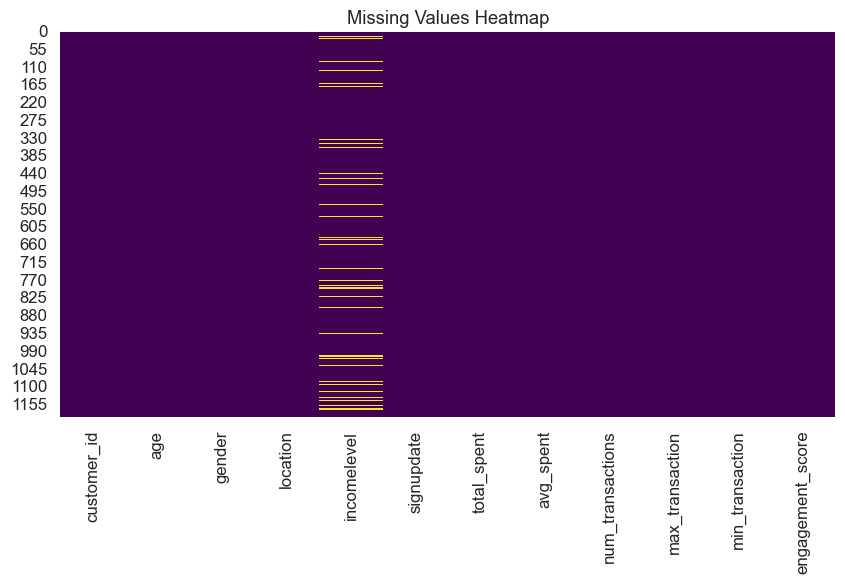

In [3]:
# --- 3. Missing Values Analysis ---
plt.figure(figsize=(10,5))
sns.heatmap(merged.isna(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


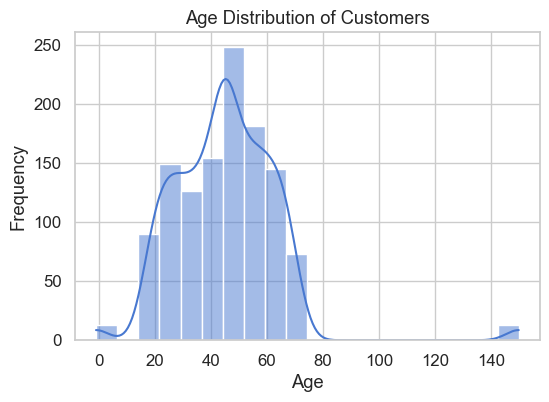

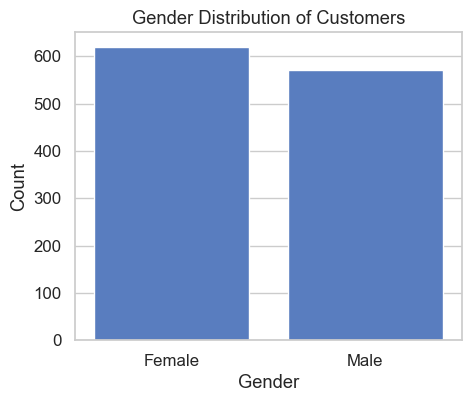

In [4]:
# --- 4. Demographic Analysis ---
# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(merged["age"], bins=20, kde=True)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Gender distribution (if available)
if "gender" in merged.columns:
    plt.figure(figsize=(5,4))
    sns.countplot(x="gender", data=merged)
    plt.title("Gender Distribution of Customers")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.show()


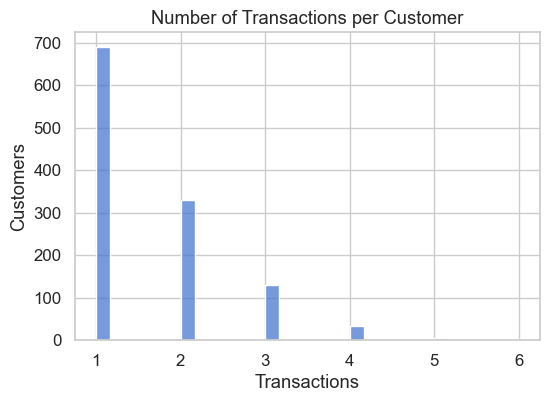

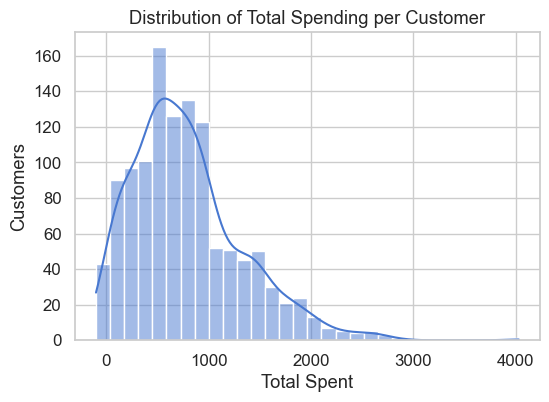

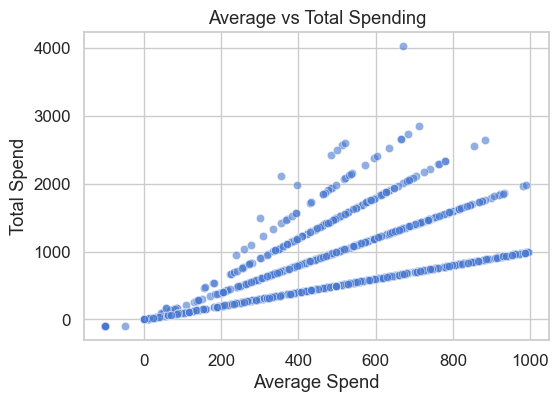

In [5]:
# --- 5. Transaction Analysis ---
# Number of transactions
plt.figure(figsize=(6,4))
sns.histplot(merged["num_transactions"], bins=30, kde=False)
plt.title("Number of Transactions per Customer")
plt.xlabel("Transactions")
plt.ylabel("Customers")
plt.show()

# Spending distribution
plt.figure(figsize=(6,4))
sns.histplot(merged["total_spent"], bins=30, kde=True)
plt.title("Distribution of Total Spending per Customer")
plt.xlabel("Total Spent")
plt.ylabel("Customers")
plt.show()

# Avg vs Total Spending
plt.figure(figsize=(6,4))
sns.scatterplot(x="avg_spent", y="total_spent", data=merged, alpha=0.6)
plt.title("Average vs Total Spending")
plt.xlabel("Average Spend")
plt.ylabel("Total Spend")
plt.show()


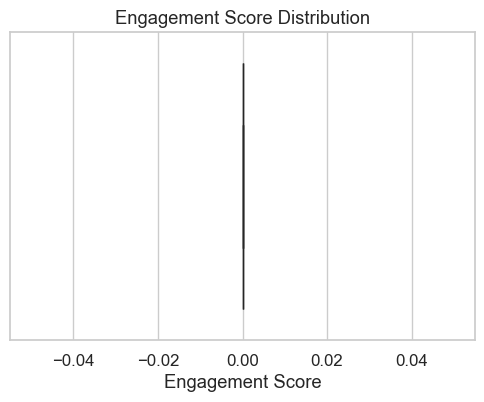

In [6]:
# --- 6. Social Engagement Analysis ---
# Engagement score distribution
plt.figure(figsize=(6,4))
sns.boxplot(x=merged["engagement_score"], color="purple")
plt.title("Engagement Score Distribution")
plt.xlabel("Engagement Score")
plt.show()

# Correlation between social metrics (if likes/comments/shares exist)
social_cols = [c for c in ["likes", "comments", "shares"] if c in merged.columns]
if social_cols:
    plt.figure(figsize=(6,5))
    sns.heatmap(merged[social_cols].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title("Correlation Between Social Engagement Metrics")
    plt.show()

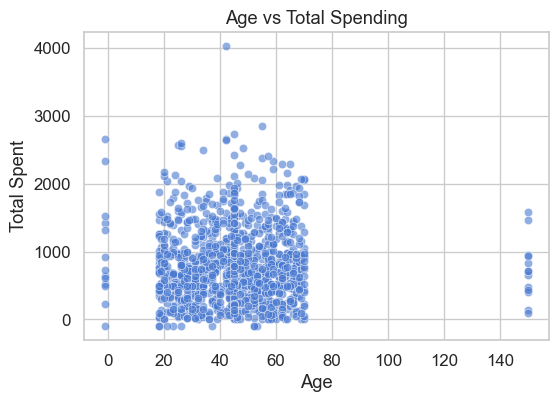

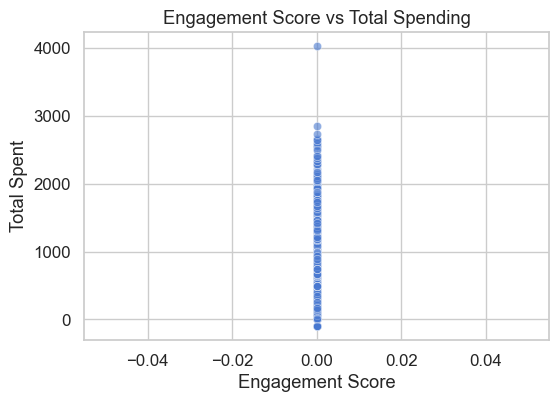

In [7]:
# --- 7. Relationships Between Features ---
# Age vs Total Spending
plt.figure(figsize=(6,4))
sns.scatterplot(x="age", y="total_spent", data=merged, alpha=0.6)
plt.title("Age vs Total Spending")
plt.xlabel("Age")
plt.ylabel("Total Spent")
plt.show()

# Engagement vs Total Spending
plt.figure(figsize=(6,4))
sns.scatterplot(x="engagement_score", y="total_spent", data=merged, alpha=0.6)
plt.title("Engagement Score vs Total Spending")
plt.xlabel("Engagement Score")
plt.ylabel("Total Spent")
plt.show()

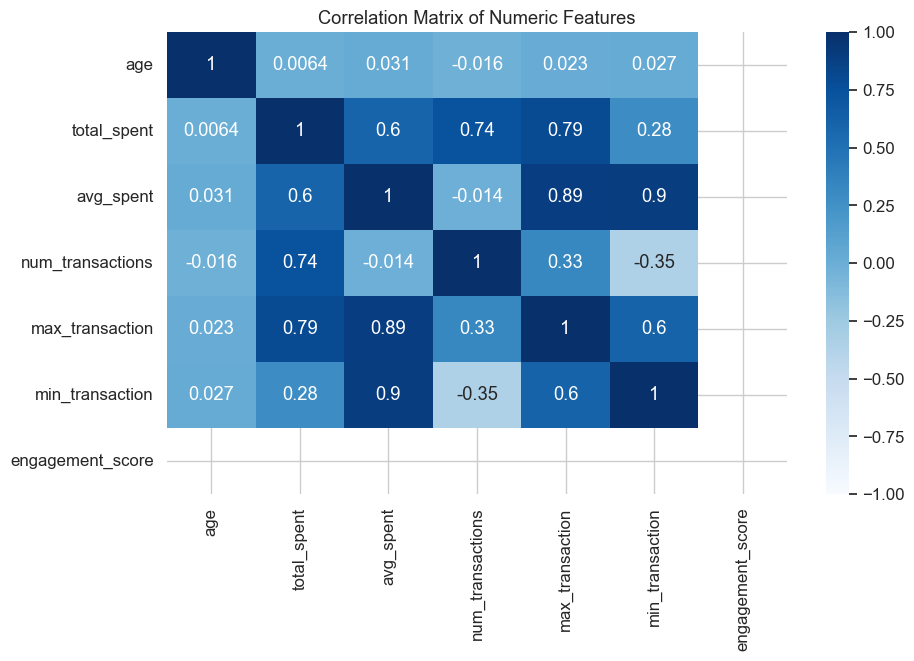

In [8]:
# --- 8. Correlation Matrix ---
plt.figure(figsize=(10,6))
sns.heatmap(merged.corr(numeric_only=True), annot=True, cmap="Blues", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [9]:
# --- 9. Save EDA Outputs ---
# Save descriptive stats
eda_summary = merged.describe(include="all").transpose()
eda_summary.to_csv("eda_summary.csv")
print("\n✅ EDA summary saved as 'eda_summary.csv'")


✅ EDA summary saved as 'eda_summary.csv'
